In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel

In [77]:
def learning_curve():
    curve_portfolio = []
    curve_market = []
    for i in range(1, 2001):
        
        value = pd.read_hdf(f'regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ValueCallback/Total_Objectives_in_iteration_{str(i).zfill(5)}.h5')
        if (i - 1)% 20 < 10:
            curve_portfolio.append(np.mean(value.objective))
        else:
            curve_market.append(np.mean(value.objective))
    return curve_portfolio, curve_market

In [78]:
port, market = learning_curve()

Text(0, 0.5, 'Cost by iteration')

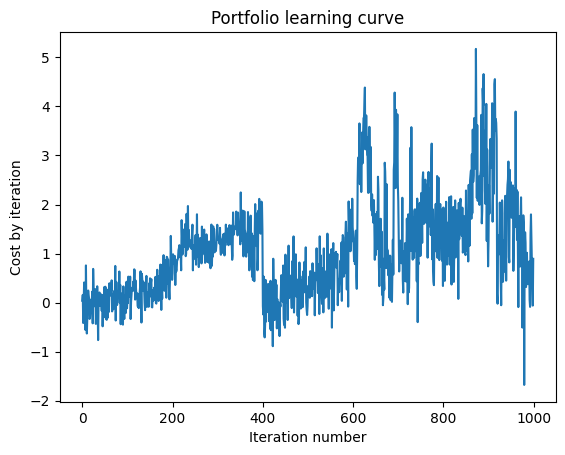

In [79]:
plt.plot(port)
plt.xlabel('Iteration number')
plt.title('Portfolio learning curve')
plt.ylabel('Cost by iteration')

Text(0, 0.5, 'Cost by iteration')

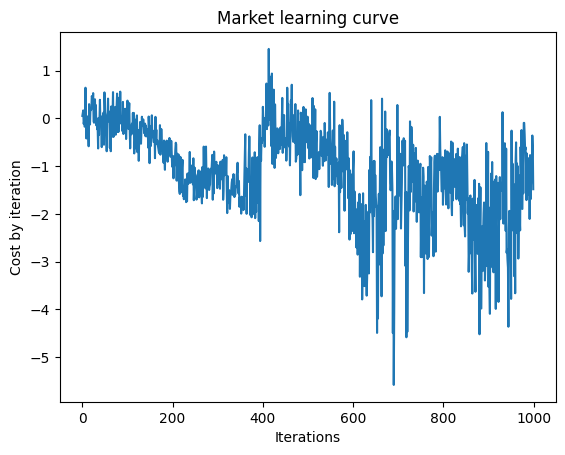

In [80]:
plt.plot(market)
plt.xlabel('Iterations')
plt.title('Market learning curve')
plt.ylabel('Cost by iteration')

Text(0, 0.5, 'Critic value by epoch')

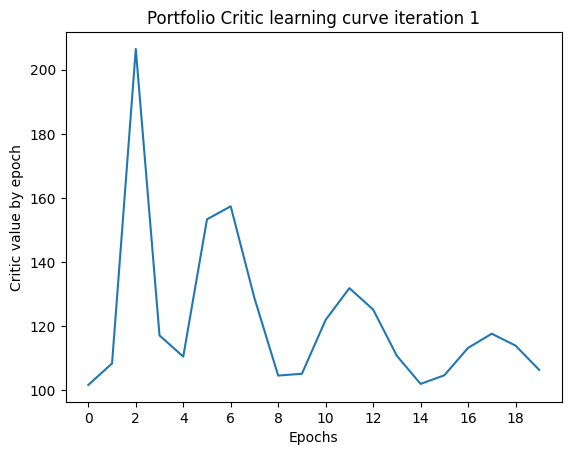

In [62]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00001.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Portfolio Critic learning curve iteration 1')
plt.ylabel('Critic value by epoch')

Text(0, 0.5, 'Critic value by epoch')

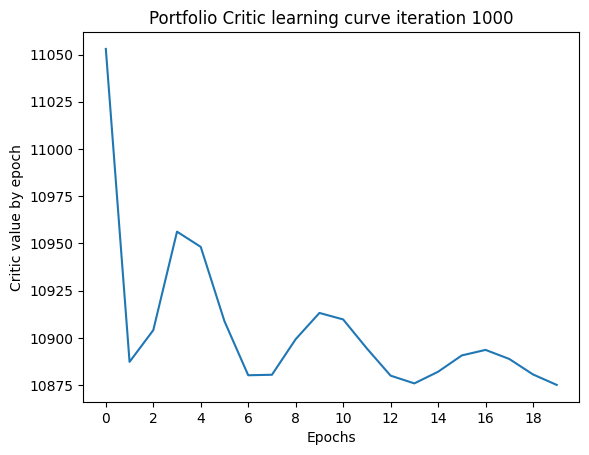

In [63]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 01990.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Portfolio Critic learning curve iteration 1000')
plt.ylabel('Critic value by epoch')

Text(0, 0.5, 'Critic value by epoch')

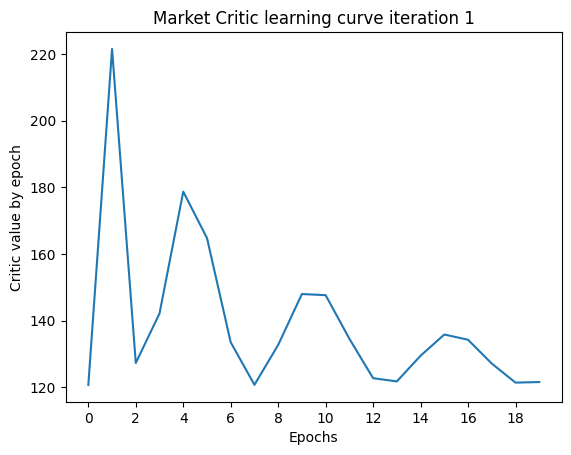

In [64]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00011.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Market Critic learning curve iteration 1')
plt.ylabel('Critic value by epoch')

Text(0, 0.5, 'Critic value by epoch')

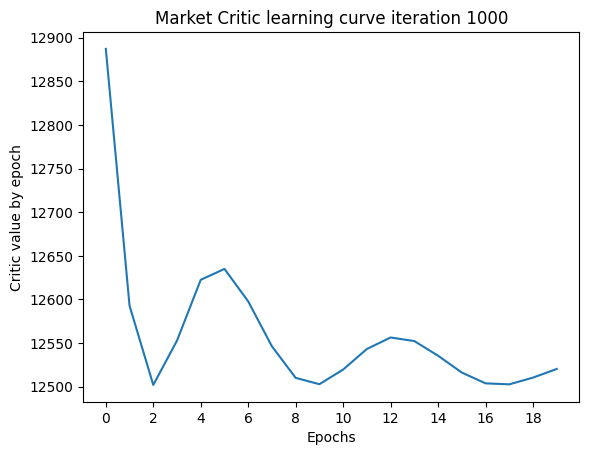

In [65]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ObjectiveSaver/B. Critic objective. It 02000.h5')
plt.plot(critic.objective)
plt.xticks(range(0, 20, 2))
plt.xlabel('Epochs')
plt.title('Market Critic learning curve iteration 1000')
plt.ylabel('Critic value by epoch')

In [66]:
history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-21-49/0/.callbacks/HistoricalDataCallback/observations_actions_it_00050_ep_00002.h5')[1:]
history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-29-43/0/.callbacks/HistoricalDataCallback/observations_actions_it_00050_ep_00004.h5')[1:]

In [67]:
history_sim = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/HistoricalDataCallback/observations_actions_it_01200_ep_00008.h5')[1:]

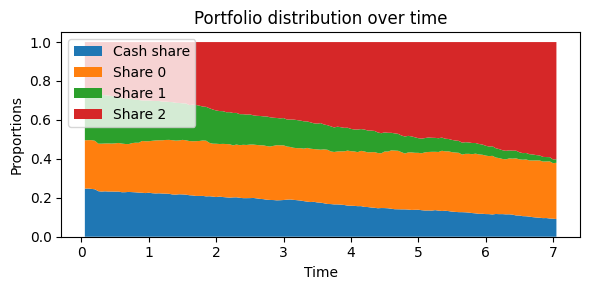

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Transpose the data
data = np.array(history_sim[['cash share', 'share_0', 'share_1', 'share_2']]).T

# Plotting
plt.figure(figsize=(6,3))

# Plot the stacked area plot
plt.stackplot(history_sim.time.to_list(), data, labels=['Cash share', 'Share 0', 'Share 1', 'Share 2'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Proportions')
plt.title('Portfolio distribution over time')
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


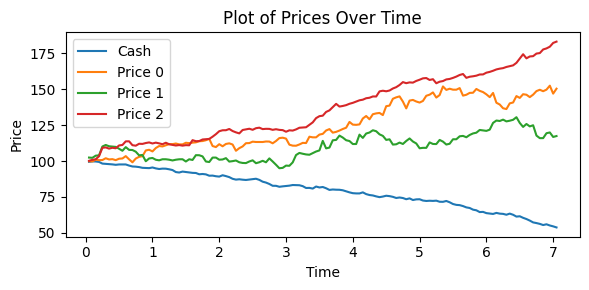

In [69]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(6, 3))

# Plot all prices on the same plot
plt.plot(history_sim['time'], history_sim['cash [USD]'], label='Cash')
plt.plot(history_sim['time'], history_sim['current_price_0 [USD]'],  label='Price 0')
plt.plot(history_sim['time'], history_sim['current_price_1 [USD]'],  label='Price 1')
plt.plot(history_sim['time'], history_sim['current_price_2 [USD]'], label='Price 2')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Plot of Prices Over Time')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


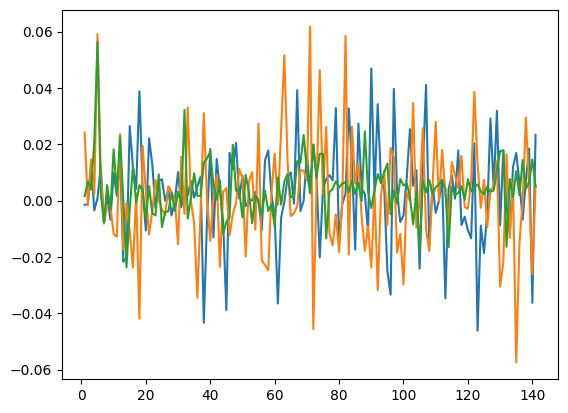

In [70]:
plt.plot(history_sim.returns_0)
plt.plot(history_sim.returns_1)
plt.plot(history_sim.returns_2)

In [71]:
np.std(history_sim.returns_2)

0.009540333541666416

In [72]:
np.std(history_0.returns_0)

0.004644155223152778

In [73]:
history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-21-49/0/.callbacks/HistoricalDataCallback/observations_actions_it_00001_ep_00001.h5')[1:]
history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-29-43/0/.callbacks/HistoricalDataCallback/observations_actions_it_00001_ep_00007.h5')[1:]

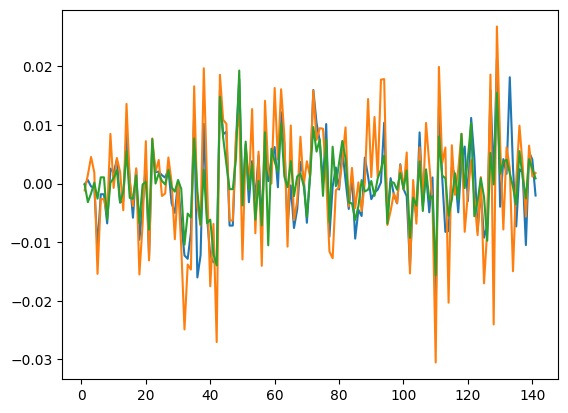

In [74]:
plt.plot(history_0.returns_0)
plt.plot(history_0.returns_1)
plt.plot(history_0.returns_2)

In [76]:
def calculate_sharpe_PnL():

    for j in range(1, 51):
        sharpe_0 = []
        sharpe_1 = []
        sharpe_based = []
        pnl_0 = []
        pnl_1 = []
        pnl_based = []
        returns_0 = []
        returns_1 = []
        for i in range(1, 16):

            history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-21-49/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-29-43/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_0['PnL'] = (history_0['current_price_0 [USD]']*history_0['current_volume_0'] +
                history_0['current_price_1 [USD]']*history_0['current_volume_1']+
                history_0['current_price_2 [USD]']*history_0['current_volume_2']+
                history_0['cash [USD]'])
            history_1['PnL'] = (history_1['current_price_0 [USD]']*history_1['current_volume_0'] +
                history_1['current_price_1 [USD]']*history_1['current_volume_1']+
                history_1['current_price_2 [USD]']*history_1['current_volume_2']+
                history_1['cash [USD]'])
            history_0['sum_of_prices'] = (history_0['current_price_0 [USD]'] +
                history_0['current_price_1 [USD]']+
                history_0['current_price_2 [USD]']+ 100)
            history_0['port_return'] = (history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1)
            history_1['port_return'] = (history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1)
            returns_0.extend(history_0['port_return'].to_list())
            returns_1.extend(history_1['port_return'].to_list())
            sharpe_based.append(np.mean((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1))/np.std((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1)))
            sharpe_0.append(np.mean((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1))/np.std((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1)))
            sharpe_1.append(np.mean((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1))/np.std((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1)))
            pnl_0.append(history_0['PnL'].iloc[-1] - history_0['PnL'].iloc[0])
            pnl_1.append(history_1['PnL'].iloc[-1] - history_1['PnL'].iloc[0])
            pnl_based.append(history_0['sum_of_prices'].iloc[-1] - history_0['sum_of_prices'].iloc[0])
        print(j,np.mean(sharpe_based), np.mean(sharpe_0), np.mean(sharpe_1), np.mean(pnl_based), np.mean(pnl_0), np.mean(pnl_1))
        print(j,np.std(sharpe_based), np.std(sharpe_0), np.std(sharpe_1), np.std(pnl_based), np.std(pnl_0), np.std(pnl_1))
        print(ttest_rel(returns_0, returns_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(sharpe_0, sharpe_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_rel(pnl_0, pnl_1, alternative = 'less', nan_policy = 'omit'))
    return returns_0, returns_1, sharpe_0, sharpe_1

returns_0, returns_1, sharpe_0, sharpe_1 = calculate_sharpe_PnL()

1 0.028242244128496068 0.02746908573955339 0.030879068273934156 4.568666666666671 4.364031813204207 4.515393033060089
1 0.05109032084936879 0.05128229287614592 0.053855740344873546 12.567922589760892 12.377566846588154 36.26467108612541
TtestResult(statistic=-0.24003194058157837, pvalue=0.40516446680721024, df=2099)
TtestResult(statistic=-0.42024684295069487, pvalue=0.34034192543696273, df=14)
TtestResult(statistic=-0.02174809140714052, pvalue=0.4914779155694434, df=14)
2 0.0262988565221697 0.025865747651945156 0.046091272107634286 4.616000000000006 4.5133399042031295 15.775664181016705
2 0.062179937721943045 0.06240056611019283 0.06737104572474657 9.617763981300435 9.556459051567627 18.420055776226086
TtestResult(statistic=-2.579780630821646, pvalue=0.0049768689274944595, df=2099)
TtestResult(statistic=-3.2301368920294253, pvalue=0.0030234928466645918, df=14)
TtestResult(statistic=-3.3312596881309546, pvalue=0.0024724764262438652, df=14)
3 0.021699048409564037 0.021292520207556207 0.0